<a href="https://colab.research.google.com/github/tjahjoe/PCVK-Genap-25-26/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# soal 2
import cv2
import numpy as np
from matplotlib import pyplot as plt

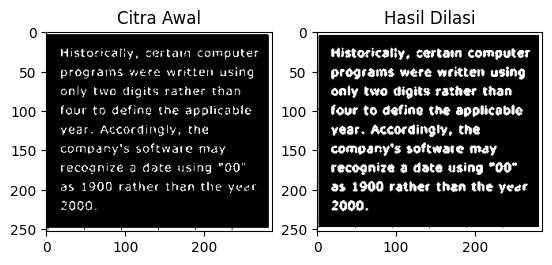

In [49]:
# soal 3
def manual_dilation(img, se):
    rows, cols = img.shape
    se_rows, se_cols = se.shape
    pad_rows = se_rows // 2
    pad_cols = se_cols // 2
    padded_img = np.pad(img, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(rows):
        for j in range(cols):
            region = padded_img[i:i+se_rows, j:j+se_cols]
            if np.any(region[se == 1] == 255):
                output[i, j] = 255

    return output

img = cv2.imread('/content/morphology.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_cross_3x3 = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

dilated_manual = manual_dilation(binary_img, se_cross_3x3)

plt.subplot(121), plt.imshow(binary_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_manual, cmap='gray'), plt.title('Hasil Dilasi')
plt.show()

Structuring Element:
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


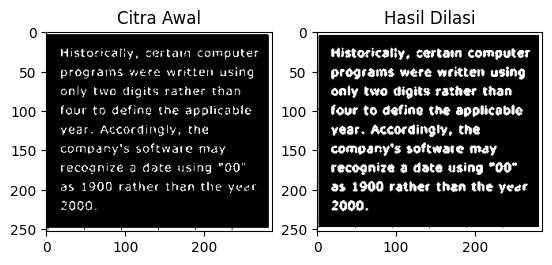

In [50]:
# soal 4
img = cv2.imread('/content/morphology.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_cross_3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
print('Structuring Element:\n', se_cross_3x3)

dilated_cv = cv2.dilate(binary_img, se_cross_3x3, iterations=1)

plt.subplot(121), plt.imshow(binary_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilated_cv, cmap='gray'), plt.title('Hasil Dilasi')
plt.show()

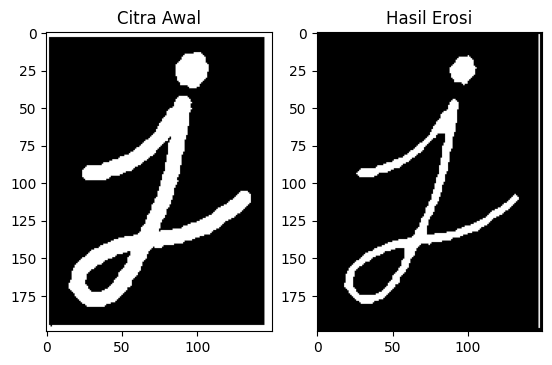

In [51]:
# soal 5
def manual_erosion(img, se):
    rows, cols = img.shape
    se_rows, se_cols = se.shape
    pad_rows = se_rows // 2
    pad_cols = se_cols // 2
    padded_img = np.pad(img, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)
    output = np.zeros_like(img)

    for i in range(rows):
        for j in range(cols):
            region = padded_img[i:i+se_rows, j:j+se_cols]
            if np.all(region[se == 1] == 255):
                output[i, j] = 255

    return output

img = cv2.imread('/content/j.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_square_5x5 = np.ones((5,5), dtype=np.uint8)

eroded_manual = manual_erosion(binary_img, se_square_5x5)

plt.subplot(121), plt.imshow(binary_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_manual, cmap='gray'), plt.title('Hasil Erosi')
plt.show()

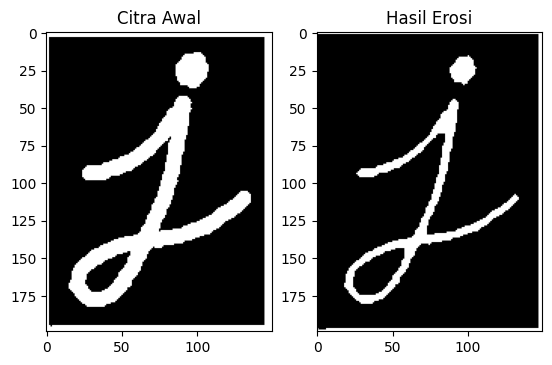

In [52]:
# soal 6
img = cv2.imread('/content/j.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_square_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

eroded_cv = cv2.erode(binary_img, se_square_5x5, iterations=1)

plt.subplot(121), plt.imshow(binary_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(eroded_cv, cmap='gray'), plt.title('Hasil Erosi')
plt.show()

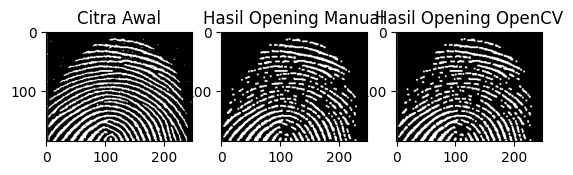

In [53]:
# soal 7
img = cv2.imread('/content/fingerprint.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_square_3x3 = np.ones((3,3), dtype=np.uint8)

eroded_manual = manual_erosion(binary_img, se_square_3x3)
opened_manual = manual_dilation(eroded_manual, se_square_3x3)

se_cv = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opened_cv = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, se_cv)

plt.subplot(131), plt.imshow(binary_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(opened_manual, cmap='gray'), plt.title('Hasil Opening Manual')
plt.subplot(133), plt.imshow(opened_cv, cmap='gray'), plt.title('Hasil Opening OpenCV')
plt.show()

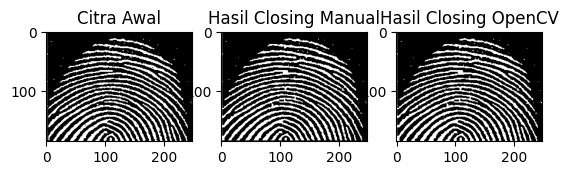

In [54]:
# soal 8
img = cv2.imread('/content/fingerprint.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_square_3x3 = np.ones((3,3), dtype=np.uint8)

dilated_manual = manual_dilation(binary_img, se_square_3x3)
closed_manual = manual_erosion(dilated_manual, se_square_3x3)

se_cv = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closed_cv = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, se_cv)

plt.subplot(131), plt.imshow(binary_img, cmap='gray'), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(closed_manual, cmap='gray'), plt.title('Hasil Closing Manual')
plt.subplot(133), plt.imshow(closed_cv, cmap='gray'), plt.title('Hasil Closing OpenCV')
plt.show()

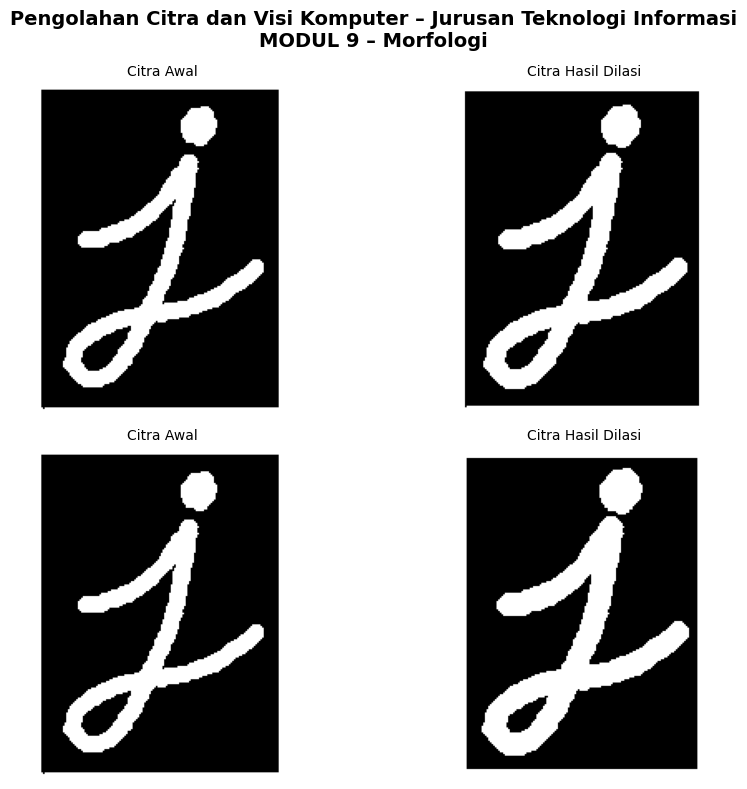

In [55]:
# soal 9
img = cv2.imread('/content/j.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_cross_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
dilated_3 = cv2.dilate(binary_img, se_cross_3, iterations=1)

se_cross_5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
dilated_5 = cv2.dilate(binary_img, se_cross_5, iterations=1)

plt.figure(figsize=(10, 8))
plt.suptitle('Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi\nMODUL 9 – Morfologi', fontsize=14, fontweight='bold')

plt.subplot(221)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(222)
plt.imshow(dilated_3, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.subplot(223)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(224)
plt.imshow(dilated_5, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

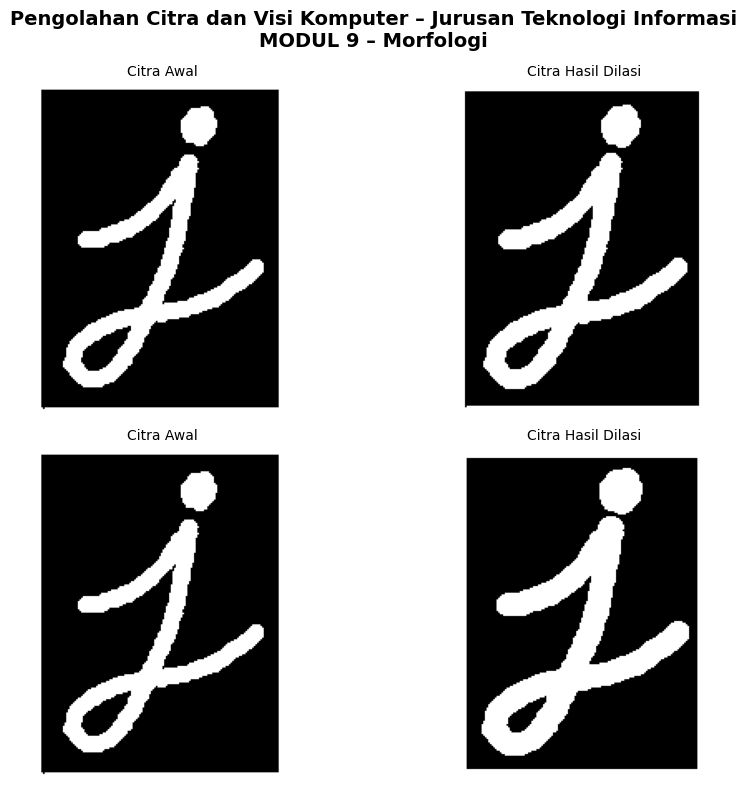

In [56]:
# soal 10
img = cv2.imread('/content/j.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_ellipse_3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dilated_3 = cv2.dilate(binary_img, se_ellipse_3, iterations=1)

se_ellipse_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
dilated_5 = cv2.dilate(binary_img, se_ellipse_5, iterations=1)

plt.figure(figsize=(10, 8))
plt.suptitle('Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi\nMODUL 9 – Morfologi', fontsize=14, fontweight='bold')

plt.subplot(221)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(222)
plt.imshow(dilated_3, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.subplot(223)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(224)
plt.imshow(dilated_5, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

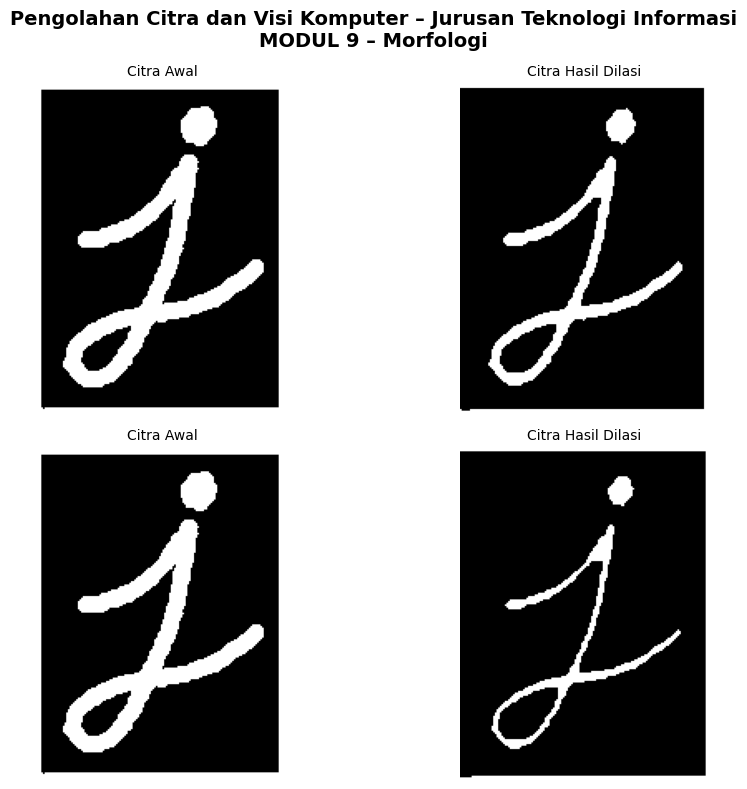

In [57]:
# soal 11
img = cv2.imread('/content/j.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_rect_3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
eroded_3x5 = cv2.erode(binary_img, se_rect_3x5, iterations=1)

se_rect_5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,5))
eroded_5x7 = cv2.erode(binary_img, se_rect_5x7, iterations=1)
plt.figure(figsize=(10, 8))
plt.suptitle('Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi\nMODUL 9 – Morfologi', fontsize=14, fontweight='bold')

plt.subplot(221)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(222)
plt.imshow(eroded_3x5, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.subplot(223)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(224)
plt.imshow(eroded_5x7, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()

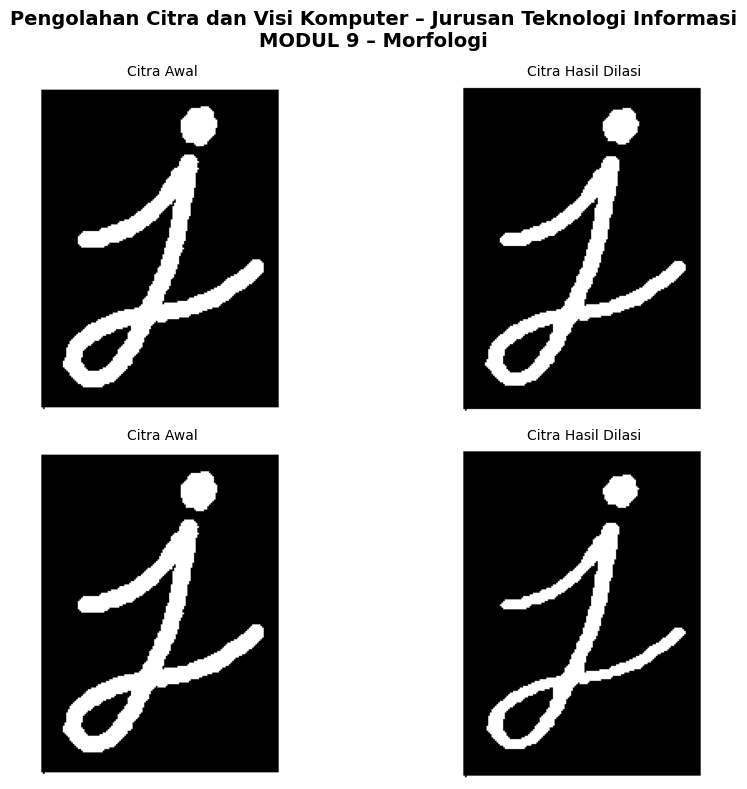

In [58]:
# soal 12
img = cv2.imread('j.png', cv2.IMREAD_GRAYSCALE)
_, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

se_line_3 = np.array([[1],
                      [1],
                      [1]], dtype=np.uint8).reshape(3,1)

eroded_3 = cv2.erode(binary_img, se_line_3, iterations=1)

se_line_5 = np.array([[1],
                      [1],
                      [1],
                      [1],
                      [1]], dtype=np.uint8).reshape(5,1)
eroded_5 = cv2.erode(binary_img, se_line_5, iterations=1)

plt.figure(figsize=(10, 8))
plt.suptitle('Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi\nMODUL 9 – Morfologi', fontsize=14, fontweight='bold')

plt.subplot(221)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(222)
plt.imshow(eroded_3, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.subplot(223)
plt.imshow(binary_img, cmap='gray')
plt.title('Citra Awal', fontsize=10)
plt.axis('off')

plt.subplot(224)
plt.imshow(eroded_5, cmap='gray')
plt.title('Citra Hasil Dilasi', fontsize=10)
plt.axis('off')

plt.tight_layout()
plt.show()